# Lancaster Area Prosperity Analysis

## 0. Introduction

Rerspected shareholders,  

    Region Inteligence send its regard. In this notebook we will introduce our 3-step analysis structure, namely Area Prosperity Analysis, Lucrative Parcels Analysis and Parcel Pricing Analysis.
    
    To begin with, the Area Prosperity Analysis is based on three presumptions:
    
        1) The planning porjects would boost general prosperity within the area, therefore enhancing nearby parcels' value.
        2) There are no determinant projects, meaning that no projects are powerful enough to build up a new city from wastelands.
        3) The unit square meter parcel values within a certain area are generally the same.
    
    Inducted from these presumptions, to filter out the lucrative parcels, we need to figure out which project areas has the highest prosperity levels.
    
    The Area Prosperity Level quantifies whether the local business environment can meet the daily demand of the area population and the future operation demand of new business players. Due to such defination, the area range radius should be 1 mile, which is the acceptable travel distnace with feet. The constitute factors of area prosperity include:
    
        1) Retailing Services
        2) Health Care Services
        3) Education Services
        4) Finance Services
        5) Entertainment Services
        6) Administration Services
        
    We are more likely to find a good parcel for construction suppose there are good services for all 6 aspects. 
    
    The general culculation method for the rate of each factor is the sum of service quantity * service quality. For example, when determine the quality for retailing businesses, we assume that local business stores have the lowest price level meaning they offer the basic serviec level (=1), and there are chain stores with various level of price level from inexpensive (=1) to expensive (=5). And we can time these quality rate with the quantity of business units for each level to get the area retailing prosperity rate.
    
    After filtering out the areas with highest prosperity rate, we can then look into the parcels within the range. Generally, the outline of Lucrative Parcel Analysis is to conduct a SWOT analysis for each parcel but in a special design that best suits the data source:
    
        1) Land Use Suitability (Strenght)
        2) Land Use Contraints (Weakness)
        3) Tax Delinquent Parcels with Debted Owner (Opportunity)
        4) Hazards (Threat)
    
    For all the parcels, we shall set a threashold for Land Use Contraints and Hazards first and filter out the parcels with clean background. After that, we will rank them according to their scores in Land Use Suitability and Tax Delinquency.
    
    Finally, a Parcel Pricing Model is needed to generate a upper and lower bound for negotiation. We expect this model to be linear since it is more convinient for explanation with shareholders as well as our deal counterparts. It still remains a probelm for us to determine the range of training data and form a proper validation set, we will look into this after finish the second step analysis.

## 1. Proximity 

#### We have finished the calculation in the previous notebook. Here we just gonna pull it out

In [1]:
import pandas as pd

parcel_radius = pd.read_csv("example_radius.csv")
hazards_df = pd.read_csv("lancaster_hazards.csv")

parcel_radius.head()

,Intersection,AIN,Radius
0,Ave H-12 & Challenger Way,3146001007,635.896104
1,Ave H-12 & Challenger Way,3146023023,766.026784
2,Ave H-12 & Challenger Way,3146023024,767.968599
3,Ave H-12 & Challenger Way,3146023025,770.556581
4,Ave H-12 & Challenger Way,3146023026,773.700465


## 2. Land Demographic

In [2]:
land_use_df = pd.read_csv("lancaster_land_use.csv")

land_use_df.head()

,Unnamed: 0,mapbook_number,page_number,parcel_number,county_name,ri_county_id,city_name,city_id,multipart,stack,...,setback_parking_adu,small_parking_adu,setback_small_parking_adu,jurisdiction_label,land_use_class_name,shape_length,shape_area,centroid_x,centroid_y,state_name
0,562248,3001,10,7,Los Angeles,37,Unincorporated,99999,1,1,...,False,False,False,Los Angeles County (Unincorporated),Agriculture,543.702104,16839.916584,-118.188276,34.629074,California
1,562345,3001,13,39,Los Angeles,37,Unincorporated,99999,1,1,...,False,False,False,Los Angeles County (Unincorporated),Vacant,595.160384,14683.270299,-118.167829,34.630148,California
2,562443,3001,16,44,Los Angeles,37,Unincorporated,99999,1,1,...,False,False,False,Los Angeles County (Unincorporated),Agriculture,483.640549,14581.565700,-118.179583,34.622361,California
3,562593,3001,21,36,Los Angeles,37,Unincorporated,99999,1,1,...,False,False,False,Los Angeles County (Unincorporated),Vacant,499.711055,15625.001667,-118.169439,34.614101,California
4,562603,3001,21,46,Los Angeles,37,Unincorporated,99999,1,1,...,False,False,False,Los Angeles County (Unincorporated),Under Construction,435.898697,9507.542484,-118.166226,34.614021,California


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96506 entries, 0 to 96505
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      96506 non-null  int64  
 1   mapbook_number                  96506 non-null  int64  
 2   page_number                     96506 non-null  int64  
 3   parcel_number                   96506 non-null  int64  
 4   county_name                     96506 non-null  object 
 5   ri_county_id                    96506 non-null  int64  
 6   city_name                       96506 non-null  object 
 7   city_id                         96506 non-null  int64  
 8   multipart                       96506 non-null  int64  
 9   stack                           96506 non-null  int64  
 10  acreage                         96506 non-null  float64
 11  slope                           96506 non-null  int64  
 12  apn_dup      

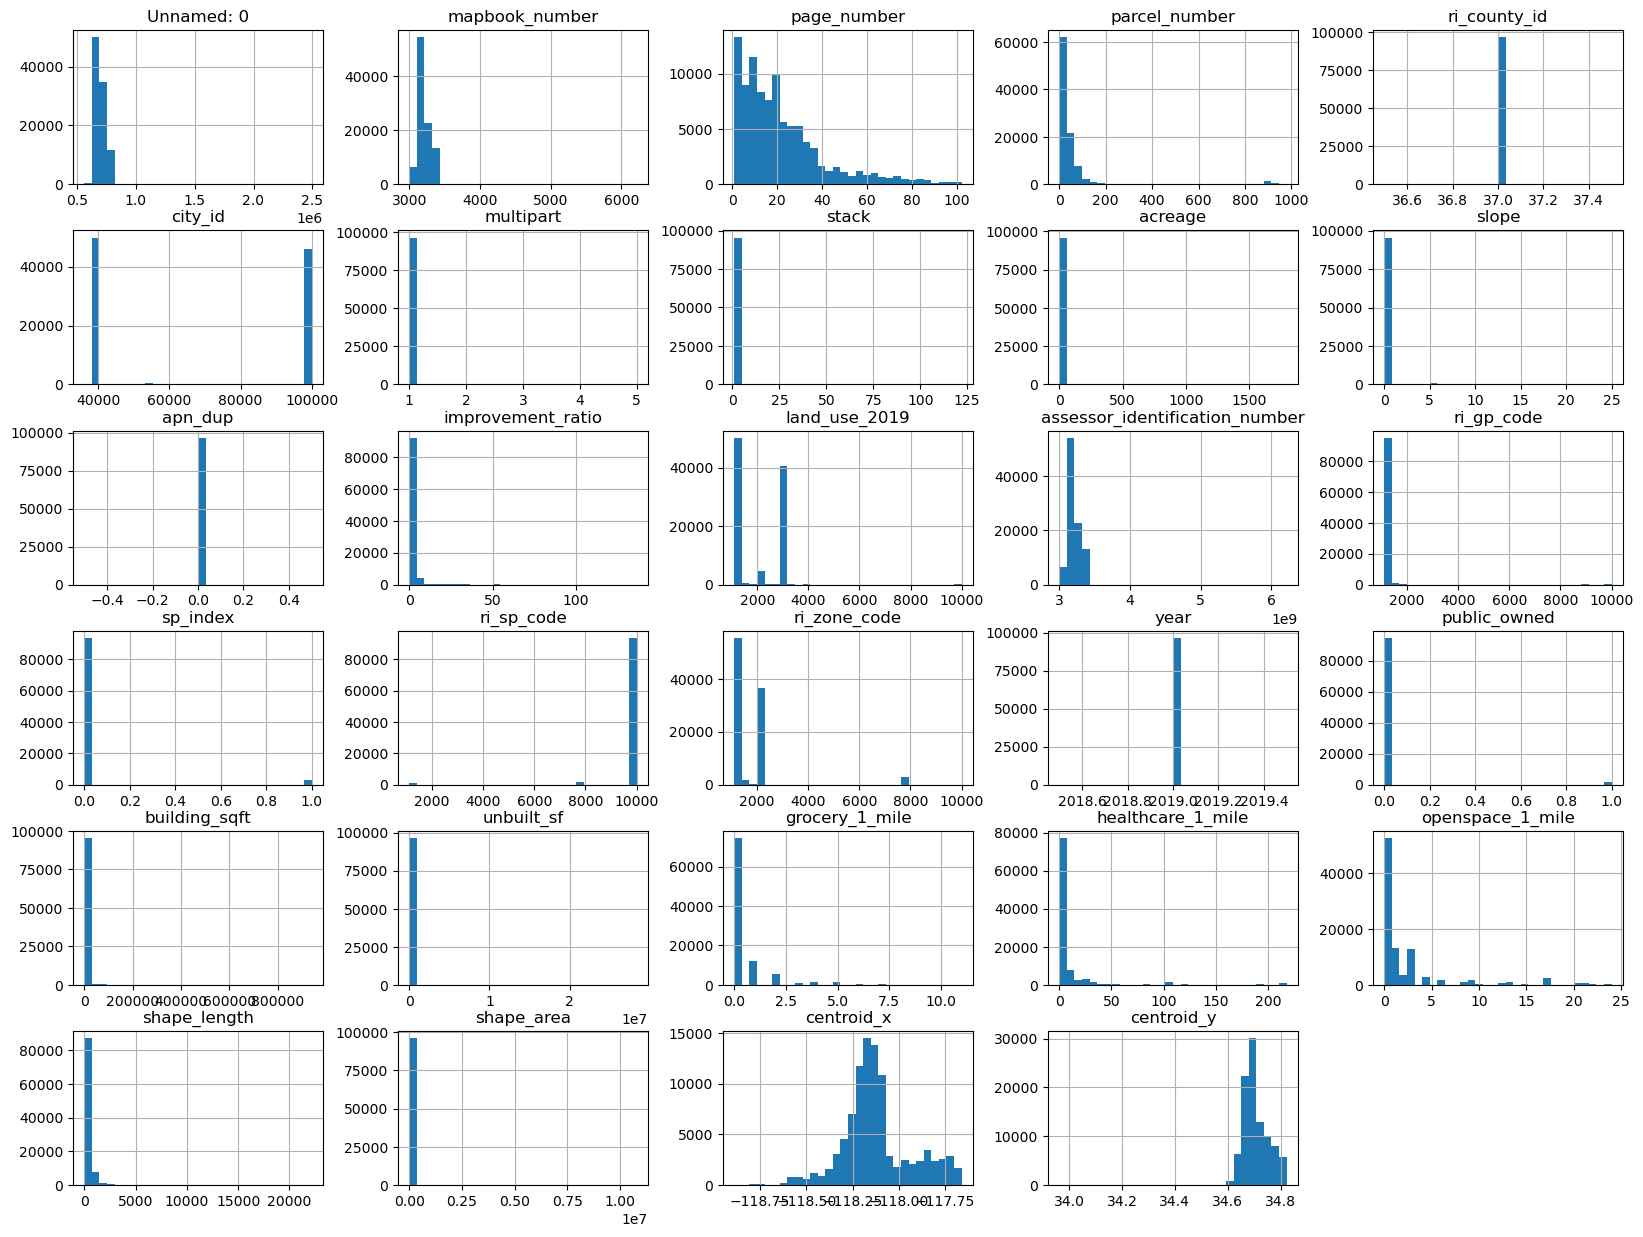


Unique Values in Categorical Features:
Unnamed: 0                        96506
mapbook_number                      153
page_number                         102
parcel_number                       352
county_name                           1
ri_county_id                          1
city_name                             4
city_id                               4
multipart                             5
stack                                27
acreage                           95366
slope                                 6
apn_dup                               1
improvement_ratio                 24359
land_use_2019                        84
land_use_source_2019                  5
assessor_identification_number    96506
city_gp_code                         46
ri_gp_code                           25
sp_index                              2
city_sp_code                         25
ri_sp_code                            8
city_zone_code                       63
ri_zone_code                         24


In [3]:
# EDA
import matplotlib.pyplot as plt

# 1. Basic Information
print("Basic Information:")
print(land_use_df.info())

# 2. Distribution of Numerical Features
print("\nDistribution of Numerical Features:")
land_use_df.hist(bins=30, figsize=(20, 15))
plt.show()

# 3. Unique Values in Categorical Features
print("\nUnique Values in Categorical Features:")
print(land_use_df.nunique())

In [4]:
# Counting the number of True values for each column in the dataframe
true_value_counts = land_use_df.iloc[:, 37:53].apply(lambda x: x[x == True].count())

# Display the counts of True values for each column
print("Counts of TRUE values for each column:")
print(true_value_counts)

Counts of TRUE values for each column:
high_quality_transit_area        1228
job_center                      14208
neighborhood_mobility_area       2513
absolute_constraint               838
variable_constraint             54114
environment_justice_area        51063
disadvantaged_community_area     3752
community_of_concern                1
adu_space_possibility           36445
setback_reduction_adu           36918
small_adu_possibility           36891
parking_exemption_adu           36865
setback_small_adu               36933
setback_parking_adu             36918
small_parking_adu               36893
setback_small_parking_adu       36933
dtype: int64


In [5]:
parcel_demo = pd.merge(parcel_radius, land_use_df, left_on='AIN', right_on='assessor_identification_number', how='inner')
parcel_demo = parcel_demo.fillna(0)

parcel_demo.head()

,Intersection,AIN,Radius,Unnamed: 0,mapbook_number,page_number,parcel_number,county_name,ri_county_id,city_name,...,setback_parking_adu,small_parking_adu,setback_small_parking_adu,jurisdiction_label,land_use_class_name,shape_length,shape_area,centroid_x,centroid_y,state_name
0,Ave H-12 & Challenger Way,3146001007,635.896104,674220,3146,1,7,Los Angeles,37,Lancaster,...,False,False,False,Lancaster,Facilities,702.715534,28416.087140,-118.113375,34.703178,California
1,Ave H-12 & Challenger Way,3146023023,766.026784,674998,3146,23,23,Los Angeles,37,Lancaster,...,True,True,True,Lancaster,Single Family Residential,129.433461,1016.656909,-118.112936,34.702176,California
2,Ave H-12 & Challenger Way,3146023024,767.968599,674999,3146,23,24,Los Angeles,37,Lancaster,...,True,True,True,Lancaster,Single Family Residential,125.193319,895.709612,-118.113148,34.702175,California
3,Ave H-12 & Challenger Way,3146023025,770.556581,675000,3146,23,25,Los Angeles,37,Lancaster,...,True,True,True,Lancaster,Single Family Residential,125.363065,898.988631,-118.113348,34.702172,California
4,Ave H-12 & Challenger Way,3146023026,773.700465,675001,3146,23,26,Los Angeles,37,Lancaster,...,True,True,True,Lancaster,Single Family Residential,125.369857,899.112685,-118.113547,34.702170,California


## 3. Need to Sell / Entity Ownership

In [6]:
secured_df = pd.read_csv("lancaster_secured.csv ")

secured_df.head()

,Unnamed: 0,mapbook_number_x,page_number_x,parcel_number_x,assessor_identification_number,taxrate_area_x,agency_number,land_roll_year,land_current_value,imp_current_roll_year,...,state_name_y,recording_date_year_y,recording_date_month_y,recording_date_day_y,address_date_of_last_change_year,address_date_of_last_change_month,address_date_of_last_change_day,mail_address_date_of_last_change_year,mail_address_date_of_last_change_month,mail_address_date_of_last_change_day
0,0,3001,10,7,3001010007,15062,0,2024,128768,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3001,13,39,3001013039,15062,0,2024,148777,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3001,16,44,3001016044,15062,0,2024,112999,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3001,21,36,3001021036,15064,0,2024,114661,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3001,21,46,3001021046,15064,0,2024,23,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
parcel_secured = pd.merge(parcel_radius, secured_df, left_on='AIN', right_on='assessor_identification_number', how='inner')

parcel_secured.head()

,Intersection,AIN,Radius,Unnamed: 0,mapbook_number_x,page_number_x,parcel_number_x,assessor_identification_number,taxrate_area_x,agency_number,...,state_name_y,recording_date_year_y,recording_date_month_y,recording_date_day_y,address_date_of_last_change_year,address_date_of_last_change_month,address_date_of_last_change_day,mail_address_date_of_last_change_year,mail_address_date_of_last_change_month,mail_address_date_of_last_change_day
0,Ave H-12 & Challenger Way,3146001007,635.896104,33802,3146,1,7,3146001007,10228,0,...,California,2000.0,8.0,11.0,1994.0,6.0,9.0,1970.0,1.0,1.0
1,Ave H-12 & Challenger Way,3146023023,766.026784,34581,3146,23,23,3146023023,10226,0,...,California,2019.0,5.0,31.0,2004.0,12.0,5.0,2020.0,11.0,3.0
2,Ave H-12 & Challenger Way,3146023024,767.968599,34582,3146,23,24,3146023024,10226,0,...,California,2019.0,1.0,4.0,2005.0,5.0,15.0,1970.0,1.0,1.0
3,Ave H-12 & Challenger Way,3146023025,770.556581,34583,3146,23,25,3146023025,10226,0,...,California,2018.0,5.0,17.0,2006.0,5.0,21.0,1970.0,1.0,1.0
4,Ave H-12 & Challenger Way,3146023026,773.700465,34584,3146,23,26,3146023026,10226,0,...,California,2015.0,7.0,24.0,2008.0,12.0,7.0,1970.0,1.0,1.0


In [8]:
# First owner names and their parcel amounts
first_owner_parcels = parcel_secured.groupby('first_owner_name').size().reset_index(name='count').sort_values(by='count', ascending=False)

first_owner_parcels.head()

,first_owner_name,count
2,2018 3 IH BORROWER LP,10
527,IH5 PROPERTY WEST LP,6
801,PATTERSON BURL AND PATRICIA TRS,4
596,LANCASTER 58 LLC,4
700,MESSIHA LILA TR,3


In [9]:
# Tax Delinquent lands
tax_del_parcels = parcel_secured[(secured_df['tax_stat_key'] == 1) | (secured_df['tax_stat_key'] == 2)]

first_owner_parcels_bad = tax_del_parcels.groupby('first_owner_name').size().reset_index(name='count').sort_values(by='count', ascending=False)

first_owner_parcels_bad.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17224\4233276148.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tax_del_parcels = parcel_secured[(secured_df['tax_stat_key'] == 1) | (secured_df['tax_stat_key'] == 2)]


,first_owner_name,count
0,A AND H WARNER PROPERTIES LLC,1
59,MORELLI LISA F TR,1
68,OVIEDO LUIS A,1
67,OSEI ISAAC AND MAVIS AND,1
66,OAKTREE APARTMENTS PARTNERSHIP,1


## 4. Hazard Analysis

In [10]:
hazards_df = pd.read_csv("lancaster_hazards.csv")

hazards_df.head()

,Unnamed: 0,mapbook_number,page_number,parcel_number,assessor_identification_number,jurisdiction_label,city_name,county_name,epa_brown_name,epa_brown_type,...,liquafaction_zone,landslide_zone,protected_area,river_wetland_area,wildlife_area,cnddb_rare_species_area,habitat_reserve_area,wetland_area,urbanized_area,state_name
0,562248,3001,10,7,3001010007,Los Angeles County (Unincorporated),Unincorporated,Los Angeles,Unknown,Unknown,...,False,False,False,False,False,False,False,False,True,California
1,562345,3001,13,39,3001013039,Los Angeles County (Unincorporated),Unincorporated,Los Angeles,Unknown,Unknown,...,False,False,False,False,False,False,False,False,True,California
2,562443,3001,16,44,3001016044,Los Angeles County (Unincorporated),Unincorporated,Los Angeles,Unknown,Unknown,...,False,False,False,False,False,False,False,False,True,California
3,562593,3001,21,36,3001021036,Los Angeles County (Unincorporated),Unincorporated,Los Angeles,Unknown,Unknown,...,False,False,False,False,False,False,False,False,True,California
4,562603,3001,21,46,3001021046,Los Angeles County (Unincorporated),Unincorporated,Los Angeles,Unknown,Unknown,...,False,False,False,False,False,False,False,False,True,California


#### To determine which hazards would make real estate construction unrealizable, it's important to refer to established guidelines and regulations from authoritative bodies such as the Federal Emergency Management Agency (FEMA), U.S. Geological Survey (USGS), and other environmental and urban planning agencies. Here are the justifications for considering certain hazards as making construction unrealizable:

1. Sea Rise (1 Meter and 2 Meters)  
Justification: Areas vulnerable to significant sea-level rise are at high risk of permanent inundation, making construction impractical. The National Oceanic and Atmospheric Administration (NOAA) provides projections and impact assessments of sea-level rise.  
Official Support: NOAA's Sea Level Rise Viewer and various reports on coastal resilience indicate that areas projected to be underwater are unsuitable for long-term construction.  
2. Flood Plain Zone  
Justification: Construction in flood plains is heavily restricted due to the high risk of flooding. FEMA designates Special Flood Hazard Areas (SFHAs), which are subject to severe flood risk.  
Official Support: FEMA’s Flood Insurance Rate Maps (FIRMs) and regulations in the National Flood Insurance Program (NFIP) discourage or restrict development in high-risk flood areas.  
3. Landslide Zone  
Justification: Landslide-prone areas pose a significant threat to the stability and safety of any construction. USGS provides maps and risk assessments for landslide-prone areas.  
Official Support: USGS Landslide Hazards Program and guidelines from the American Planning Association (APA) highlight the risks and recommend against building in these areas.  
4. Wetland Area  
Justification: Wetlands are protected areas due to their ecological importance and the instability of the ground for construction. Development in wetlands is typically restricted by federal and state regulations.  
Official Support: The U.S. Army Corps of Engineers and the Environmental Protection Agency (EPA) regulate activities in wetlands under the Clean Water Act, making construction in these areas generally prohibitive.  
#### Hazards That Are Typically Dealable:
1. Fire Hazard: Construction can proceed with mitigation measures such as fire-resistant materials and defensible space.  
2. Equake Zone: Construction is feasible with earthquake-resistant designs and building codes.  
3. Liquefaction Zone: Special foundation techniques can mitigate risks.  
4. Protected Area: Development restrictions vary; some areas may allow limited construction.  
5. River Wetland Area: Similar to wetlands, but the impact and regulations can vary.  
6. Wildlife Area: Development may be restricted or require mitigation to protect habitats.  
7. CNDDB Rare Species Area: Development may be allowed with specific conservation measures.  
8. Habitat Reserve Area: Similar to protected and wildlife areas.  
9. Urbanized Area: Generally, these areas are already developed or planned for development.  

In [11]:
# Define the list of fatal and dealable hazards based on the provided justification
fatal_hazards = [
    'searise_1_meter', 'searise_2_meter', 'flood_plain_zone', 'landslide_zone', 'wetland_area'
]
dealable_hazards = [
    'fire_hazard', 'equake_zone', 'liquafaction_zone', 'protected_area',
    'river_wetland_area', 'wildlife_area', 'cnddb_rare_species_area', 
    'habitat_reserve_area', 'urbanized_area'
]
all_hazards = fatal_hazards + dealable_hazards

# Function to determine hazard index and count hazards
def determine_hazard_index_and_count(row):
    fatal_count = sum(row[hazard] for hazard in fatal_hazards)
    dealable_count = sum(row[hazard] for hazard in dealable_hazards)
    total_hazard_count = fatal_count + dealable_count
    
    if fatal_count > 0:
        hazard_index = 'Fatal'
    elif dealable_count > 0:
        hazard_index = 'Dealable'
    else:
        hazard_index = 'No Hazard'
    
    return pd.Series([hazard_index, total_hazard_count])

# Apply the function to each row in the dataframe
hazards_df[['hazard_index', 'hazard_count']] = hazards_df.apply(determine_hazard_index_and_count, axis=1)

# Show a sample of the results
hazards_df[['assessor_identification_number', 'hazard_index', 'hazard_count']].head()



,assessor_identification_number,hazard_index,hazard_count
0,3001010007,Dealable,1
1,3001013039,Dealable,1
2,3001016044,Dealable,1
3,3001021036,Dealable,1
4,3001021046,Dealable,1


## 5. Area Analysis

#### To assess the area quality for real estate construction, certain analysis framework should be implemented deviding the ultimate goal into several aspects based on the data provided and requirements. These aspects may include but not limited to:
1. Retailing
2. Health Care 
3. Education
4. Finance
5. Entertainment
6. Administration


In [12]:
# First import business data and extract Lancaster info
business_total_1 = pd.read_csv("lancaster_businesses_1.csv")
business_total_2 = pd.read_csv("lancaster_businesses_2.csv")
business_total_3 = pd.read_csv("lancaster_businesses_3.csv")


#### The data sources have difference in information about part of the companies. According to the data provider, data source 3 is most informative and reliable. Therefore, we use data source 3 for the first-step analysis and use the other data sources for variation.

In [13]:
# Filter out businesses in Lancaster
lancaster_business = business_total_3[business_total_3["City"] == "Lancaster"]

lancaster_business.head()

,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score
1,1,10 4 Trucking Academy,46400 division st,Division,Lancaster,CA,93535,611692,NaN,NaN,SafeGraph,zzy-222@5z4-x9p-b8v,Automobile Driving Schools,"46400 division st, Lancaster, CA 93535",POINT (-118.130606390718 34.725900619907),100.0
2,2,100 Percent Vida Asambleas De Dios,43127 40th st w,40th,Lancaster,CA,93536,813110,NaN,NaN,SafeGraph,223-222@5z4-xcb-kmk,Religious Organizations,"43127 40th st w, Lancaster, CA 93536",POINT (-118.201870991942 34.666322998081),100.0
3,3,10th & I Smog & Gas,1007 w avenue i,Avenue I,Lancaster,CA,93534,447110,NaN,1.661726e+10,SafeGraph,223-222@5z4-x9w-6c5,NaN,"1007 w avenue i, Lancaster, CA 93534",POINT (-118.148530990886 34.704236986444),100.0
6,6,1GMusic Group,803 w avenue h2,Avenue H2,Lancaster,CA,93534,512240,NaN,1.818398e+10,SafeGraph,22m-222@5z4-x9v-bx5,Sound Recording Studios,"803 w avenue h2, Lancaster, CA 93534",POINT (-118.146259998039 34.71679399941),100.0
7,7,1stspiritual5com Corporation,43732 rembrandt st,Rembrandt,Lancaster,CA,93535,813110,NaN,NaN,SafeGraph,22k-222@5z4-x94-wff,Religious Organizations,"43732 rembrandt st, Lancaster, CA 93535",POINT (-118.107253973422 34.677795015591),100.0


#### For the first step of study, we only exam the facilities within 1 miles of range for the parcels, which means facilities are within 1.5 miles of rnage of the center point planning parcel. Filter them out as fac_df which contains all the nearby facilities and businesses.

In [14]:
import pandas
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from fuzzywuzzy import fuzz


# Import the intersection and coordinates
lac_road_ints = pd.read_csv('losangeles_county_intersections_and_zipcode.csv')

# Convert the 'Coordinates' column from WKT to geometry
lancaster_business['geometry'] = lancaster_business['Coordinates'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(lancaster_business, geometry='geometry', crs="EPSG:4326")
lancaster_business = lancaster_business.drop(columns='geometry')

# First three instances from planning commission. 
data = [
    "Ave H-12 & Challenger Way",
    "56th St W & Ave J-12",
    "Ave K & 36th St W"
]

# Function to find intersection coordinates with fuzzy matching
def find_intersection_coordinates(df, search_data, threshold=80):
    """
    Find intersection coordinates using fuzzy matching.

    Parameters:
        df (DataFrame): The DataFrame containing street intersection data.
        search_data (list): A list of intersection strings to search for.
        threshold (int): The minimum match score for fuzzy matching.

    Returns:
        list: A list of tuples containing the intersection string and its coordinates.
    """
    results = []
    for pair in search_data:
        street1, street2 = pair.split(" & ")
        
        # Use fuzzy matching to find the best match for each street in the dataframe
        for idx, row in df.iterrows():
            street_matches = [
                (fuzz.token_sort_ratio(street1, row['STREET']), row['STREET'], row['POINT_X'], row['POINT_Y']),
                (fuzz.token_sort_ratio(street1, row['STREET_1']), row['STREET_1'], row['POINT_X'], row['POINT_Y']),
                (fuzz.token_sort_ratio(street2, row['STREET']), row['STREET'], row['POINT_X'], row['POINT_Y']),
                (fuzz.token_sort_ratio(street2, row['STREET_1']), row['STREET_1'], row['POINT_X'], row['POINT_Y'])
            ]
            
            # Filter matches based on the threshold
            street_matches = [match for match in street_matches if match[0] >= threshold]
            
            if len(street_matches) >= 2:
                results.append((pair, row['POINT_X'], row['POINT_Y']))
                break  # Assuming one match per pair for simplicity

    return results

# Function to find nearby facilities using coordinates instead of addresses
def find_nearby_facilities(coordinates, gdf, meters):
    """
    Find nearby AINs within a specified radius of given coordinates.
   
    Parameters:
        coordinates (tuple): The (x, y) coordinates around which to find nearby AINs.
        gdf (GeoDataFrame): The GeoDataFrame containing the AINs and their locations.
        meters (float): The radius in meters to search for nearby AINs.
   
    Returns:
        list: A list of AINs near the given coordinates.
    """
    # Convert coordinates to a GeoDataFrame
    point = Point(coordinates)
    point_gdf = gpd.GeoDataFrame(geometry=[point], crs="EPSG:4326")
    point_gdf = point_gdf.to_crs("EPSG:3857")  # Reproject to a CRS that uses meters
    buffer = point_gdf.buffer(meters)  # Buffer by the specified radius

    # Reproject buffer back to the original CRS
    buffer = buffer.to_crs(gdf.crs)

    # Find points within the buffer
    nearby_facilities = gdf[gdf.geometry.within(buffer.unary_union)]
    return nearby_facilities

intersection_coordinates = find_intersection_coordinates(lac_road_ints, data, threshold=80)


columns = ['Intersection'] + list(lancaster_business.columns)
fac_df = pd.DataFrame(columns=columns)


for pair, x, y in intersection_coordinates:
    nearby_facilities = find_nearby_facilities((x, y), gdf, meters=2400)
    nearby_facilities = nearby_facilities.drop(columns='geometry')
    nearby_facilities = pd.DataFrame(nearby_facilities)
    Int = {
        'Intersection': [pair] * len(nearby_facilities)
        }
    Int = pd.DataFrame(Int)
    Int.reset_index(drop=True, inplace=True)
    nearby_facilities.reset_index(drop=True, inplace=True)
    new_df = pd.concat([Int, nearby_facilities], axis = 1)
    new_df.head()
    fac_df = pd.concat([fac_df, new_df], ignore_index = True)
    
    
fac_df.head()

C:\ProgramData\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17224\1453153263.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lancaster_business['geometry'] = lancaster_business['Coordinates'].apply(wkt.loads)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17224\1453153263.py:83: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nearby_facilities = gdf[gdf.geometry.within(buffer.unary_union)]
C:\Users\Administrator\AppDa

,Intersection,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score
0,Ave H-12 & Challenger Way,178,Agape Community Church,1722 e lancaster blvd,Lancaster,Lancaster,CA,93535,813110,NaN,1.661949e+10,SafeGraph,222-222@5z4-x99-6ff,Religious Organizations,"1722 e lancaster blvd, Lancaster, CA 93535",POINT (-118.098144018137 34.696095015246),100.0
1,Ave H-12 & Challenger Way,181,Agm Market,105 w lancaster blvd,Lancaster,Lancaster,CA,93534,445110,NaN,NaN,SafeGraph,zzy-222@5z4-x9w-ckf,Supermarkets and Other Grocery Retailers (exce...,"105 w lancaster blvd, Lancaster, CA 93534",POINT (-118.130527879854 34.699133619517),100.0
2,Ave H-12 & Challenger Way,199,Aki Niihara MD,335 e avenue i,Avenue I,Lancaster,CA,93535,621111,NaN,1.323243e+10,SafeGraph,226-227@5z4-x9w-9pv,Offices of Physicians (except Mental Health Sp...,"335 e avenue i, Lancaster, CA 93535",POINT (-118.124862281873 34.7040574209),100.0
3,Ave H-12 & Challenger Way,217,Alexis Balina Rd,340 e avenue i,Avenue I,Lancaster,CA,93535,621399,NaN,1.661730e+10,SafeGraph,222-225@5z4-x9w-9mk,Offices of All Other Miscellaneous Health Prac...,"340 e avenue i, Lancaster, CA 93535",POINT (-118.124292035645 34.703361999571),100.0
4,Ave H-12 & Challenger Way,222,Alfred Gendy MD,335 e avenue i,Avenue I,Lancaster,CA,93535,621111,NaN,1.661471e+10,SafeGraph,226-225@5z4-x9w-9pv,Offices of Physicians (except Mental Health Sp...,"335 e avenue i, Lancaster, CA 93535",POINT (-118.124862281873 34.7040574209),100.0


In [15]:
# Extract files
file_path_1 = 'D:\\文件柜\\Summer\\Region Int\\Lancaster\\Factors\\nearby_business.csv'

fac_df.to_csv(file_path_1, index=False)

print(f"DataFrame fac_df successfully saved to {file_path_1}")

DataFrame fac_df successfully saved to D:\文件柜\Summer\Region Int\Lancaster\Factors\nearby_business.csv


### 1) Retailing Price Level

#### To identify the income level (consumption quality) with retailing business,  we need to filter out all the stores with NAICS starting with 44 or 45 (Retail TradeT).

In [16]:
# Filter out businesses with Primary NAICS code starting with 44 or 45
filtered_businesses = lancaster_business[lancaster_business['Primary NAICS'].astype(str).str.startswith(('44', '45'))]

# Remove duplicate businesses
unique_businesses = filtered_businesses.drop_duplicates(subset=['Company/Business Name'])


unique_businesses.head()


,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score
3,3,10th & I Smog & Gas,1007 w avenue i,Avenue I,Lancaster,CA,93534,447110,NaN,1.661726e+10,SafeGraph,223-222@5z4-x9w-6c5,NaN,"1007 w avenue i, Lancaster, CA 93534",POINT (-118.148530990886 34.704236986444),100.0
33,33,7-Eleven,44015 20th st w,20th,Lancaster,CA,93534,445120,7-Eleven,1.661723e+10,SafeGraph,222-226@5z4-xcc-6hq,NaN,"44015 20th st w, Lancaster, CA 93534",POINT (-118.166458959769 34.682779020948),100.0
34,34,7-Eleven Fuel,844 e avenue j,Avenue J,Lancaster,CA,93535,447110,7-Eleven Fuel,1.661949e+10,SafeGraph,225-226@5z4-x99-g49,NaN,"844 e avenue j, Lancaster, CA 93535",POINT (-118.112974035606 34.689039003425),100.0
46,46,A 1 Formal Wear & Boutique,1140 commerce center dr spc f-1,Commerce Center,Lancaster,CA,93534,4481,NaN,1.661493e+10,SafeGraph,zzw-22h@5z4-xcc-f9f,NaN,"1140 commerce center dr spc f-1, Lancaster, CA...",POINT (-118.150990995649 34.671623001188),100.0
71,71,A V Jewelry Mart,2011 w avenue j,Avenue J,Lancaster,CA,93536,448310,NaN,1.661949e+10,SafeGraph,229-222@5z4-x9s-7qz,NaN,"2011 w avenue j, Lancaster, CA 93536",POINT (-118.166241167498 34.689533576606),100.0


In [17]:
# Extract files
file_path_2 = 'D:\\文件柜\\Summer\\Region Int\\Lancaster\\Factors\\retail_business.csv'

unique_businesses.to_csv(file_path_2, index=False)

print(f"DataFrame unique_businesses successfully saved to {file_path_2}")

DataFrame unique_businesses successfully saved to D:\文件柜\Summer\Region Int\Lancaster\Factors\retail_business.csv


#### Since we can only determine the price level with well-known chain stores, we need to filter out them first. To identify the chain stores, I will filter the dataset by checking the presence of a Brand Name since chain stores typically have a brand name associated with them. Let's create a list of these chain stores.

In [18]:
# Filter the data to find chain stores (rows with non-null 'Brand Name')
chain_stores = unique_businesses[unique_businesses['Brand Name'].notna()]

# Select relevant columns for better clarity
chain_stores_list = chain_stores[['Company/Business Name', 'Brand Name']]

chain_stores_list

,Company/Business Name,Brand Name
33,7-Eleven,7-Eleven
34,7-Eleven Fuel,7-Eleven Fuel
149,Advance Auto Parts,Advance Auto Parts
205,Albertsons,Albertsons
291,America's Tire,America's Tire
311,American Tire Depot,American Tire Depot
318,ampm,ampm
387,Antelope Valley College,Barnes and Noble College
416,Antelope Valley Lincoln,"Lincoln,Ford Motor Company,Mazda"
466,ARCO,ARCO


In [19]:
# Extract files
file_path_3 = 'D:\\文件柜\\Summer\\Region Int\\Lancaster\\Factors\\chain_stores_list.csv'

chain_stores_list.to_csv(file_path_3, index=False)

print(f"DataFrame chain_stores_list successfully saved to {file_path_3}")

DataFrame chain_stores_list successfully saved to D:\文件柜\Summer\Region Int\Lancaster\Factors\chain_stores_list.csv


#### Since we don't have enough data we have to manually tag each business with a typical price level. Here is the result.

In [20]:
chain_price = pd.read_csv("Chain_Stores_List_with_Price_Levels.csv")
chain_price.head()

,Company/Business Name,Price Level,Price Rate
0,7-Eleven,Inexpensive,1
1,7-Eleven Fuel,Inexpensive,1
2,Advance Auto Parts,Moderate,3
3,Albertsons,Moderate,3
4,America's Tire,Moderate to Expensive,4


In [21]:
fac_retail_price = pd.merge(fac_df, chain_price, on = "Company/Business Name", how = "left")
fac_retail_price = fac_retail_price.dropna(subset = ["Price Level"])

fac_retail_price.head()

,Intersection,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score,Price Level,Price Rate
7,Ave H-12 & Challenger Way,311,American Tire Depot,1023 e avenue j,Avenue J,Lancaster,CA,93535,441320,American Tire Depot,1.661350e+10,SafeGraph,223-222@5z4-x99-ht9,NaN,"1023 e avenue j, Lancaster, CA 93535",POINT (-118.111557996884 34.69028597916),100.0,Moderate,3.0
21,Ave H-12 & Challenger Way,1134,CVS,44430 challenger way,Challenger,Lancaster,CA,93535,446110,CVS,1.661941e+10,SafeGraph,zzw-222@5z4-x99-gc5,NaN,"44430 challenger way, Lancaster, CA 93535",POINT (-118.112240032345 34.690422981368),100.0,Moderate,3.0
22,Ave H-12 & Challenger Way,1140,CVS Pharmacy,44430 challenger way,Challenger,Lancaster,CA,93535,446110,CVS Pharmacy,1.661941e+10,SafeGraph,228-225@5z4-x99-jjv,NaN,"44430 challenger way, Lancaster, CA 93535",POINT (-118.112240032345 34.690422981368),100.0,Moderate,3.0


In [44]:
# Filter out businesses with Primary NAICS code starting with 44 & 45
filtered_retailing_nearby = fac_df[fac_df['Primary NAICS'].astype(str).str.startswith(('44', '45'))]

filtered_retailing_nearby.head()

,Intersection,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score
1,Ave H-12 & Challenger Way,181,Agm Market,105 w lancaster blvd,Lancaster,Lancaster,CA,93534,445110,NaN,NaN,SafeGraph,zzy-222@5z4-x9w-ckf,Supermarkets and Other Grocery Retailers (exce...,"105 w lancaster blvd, Lancaster, CA 93534",POINT (-118.130527879854 34.699133619517),100.0
7,Ave H-12 & Challenger Way,311,American Tire Depot,1023 e avenue j,Avenue J,Lancaster,CA,93535,441320,American Tire Depot,1.661350e+10,SafeGraph,223-222@5z4-x99-ht9,NaN,"1023 e avenue j, Lancaster, CA 93535",POINT (-118.111557996884 34.69028597916),100.0
12,Ave H-12 & Challenger Way,409,Antelope Valley Ice Cream,106 e avenue i,Avenue I,Lancaster,CA,93535,445120,NaN,NaN,SafeGraph,223-223@5z4-x9w-975,NaN,"106 e avenue i, Lancaster, CA 93535",POINT (-118.130238995948 34.703699999817),100.0
21,Ave H-12 & Challenger Way,1134,CVS,44430 challenger way,Challenger,Lancaster,CA,93535,446110,CVS,1.661941e+10,SafeGraph,zzw-222@5z4-x99-gc5,NaN,"44430 challenger way, Lancaster, CA 93535",POINT (-118.112240032345 34.690422981368),100.0
22,Ave H-12 & Challenger Way,1140,CVS Pharmacy,44430 challenger way,Challenger,Lancaster,CA,93535,446110,CVS Pharmacy,1.661941e+10,SafeGraph,228-225@5z4-x99-jjv,NaN,"44430 challenger way, Lancaster, CA 93535",POINT (-118.112240032345 34.690422981368),100.0


In [46]:
# Extract files
file_path_7 = 'D:\\文件柜\\Summer\\Region Int\\Lancaster\\Factors\\retailing_nearby.csv'

filtered_retailing_nearby.to_csv(file_path_7, index=False)

print(f"DataFrame filtered_retailing_nearby successfully saved to {file_path_7}")

DataFrame filtered_retailing_nearby successfully saved to D:\文件柜\Summer\Region Int\Lancaster\Factors\retailing_nearby.csv


### 2） Healthcare Facilities

#### To see if there is necessary health care and social assistance system,  we need to filter out all the businesses with NAICS starting with 62 (Health Care and Social AssistanceT). For nearby facilities, we do not have business started by 624, which means all filtered facilities are healthcare services.

In [42]:
# Filter out businesses with Primary NAICS code starting with 62
filtered_services_nearby = fac_df[fac_df['Primary NAICS'].astype(str).str.startswith(('62'))]

filtered_services_nearby.head()

,Intersection,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score
2,Ave H-12 & Challenger Way,199,Aki Niihara MD,335 e avenue i,Avenue I,Lancaster,CA,93535,621111,NaN,1.323243e+10,SafeGraph,226-227@5z4-x9w-9pv,Offices of Physicians (except Mental Health Sp...,"335 e avenue i, Lancaster, CA 93535",POINT (-118.124862281873 34.7040574209),100.0
3,Ave H-12 & Challenger Way,217,Alexis Balina Rd,340 e avenue i,Avenue I,Lancaster,CA,93535,621399,NaN,1.661730e+10,SafeGraph,222-225@5z4-x9w-9mk,Offices of All Other Miscellaneous Health Prac...,"340 e avenue i, Lancaster, CA 93535",POINT (-118.124292035645 34.703361999571),100.0
4,Ave H-12 & Challenger Way,222,Alfred Gendy MD,335 e avenue i,Avenue I,Lancaster,CA,93535,621111,NaN,1.661471e+10,SafeGraph,226-225@5z4-x9w-9pv,Offices of Physicians (except Mental Health Sp...,"335 e avenue i, Lancaster, CA 93535",POINT (-118.124862281873 34.7040574209),100.0
10,Ave H-12 & Challenger Way,357,Anna Mckinsey,335 e avenue i,Avenue I,Lancaster,CA,93535,621111,NaN,1.661471e+10,SafeGraph,226-22x@5z4-x9w-9pv,Offices of Physicians (except Mental Health Sp...,"335 e avenue i, Lancaster, CA 93535",POINT (-118.124862281873 34.7040574209),100.0
19,Ave H-12 & Challenger Way,866,Carolyn Breuer Registered Nurse,335 e avenue i,Avenue I,Lancaster,CA,93535,621111,NaN,1.661471e+10,SafeGraph,226-22p@5z4-x9w-9pv,Offices of Physicians (except Mental Health Sp...,"335 e avenue i, Lancaster, CA 93535",POINT (-118.124862281873 34.7040574209),100.0


In [39]:
# Extract files
file_path_5 = 'D:\\文件柜\\Summer\\Region Int\\Lancaster\\Factors\\health_nearby.csv'

filtered_services_nearby.to_csv(file_path_5, index=False)

print(f"DataFrame filtered_services_nearby successfully saved to {file_path_5}")

DataFrame filtered_services_nearby successfully saved to D:\文件柜\Summer\Region Int\Lancaster\Factors\health_nearby.csv


#### From the data we can learn there are only Ambulatory Health Care Services within the area of Ave H-12 & Challenger Way	range, but no hospitals. Therefore, we can suppose that the healthcare can meet basic requirement but not completely.

### 3) Education Services

In [37]:
# Filter out businesses with Primary NAICS code starting with 61
filtered_education_nearby = fac_df[fac_df['Primary NAICS'].astype(str).str.startswith(('61'))]

filtered_education_nearby.head()

,Intersection,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score
47,Ave H-12 & Challenger Way,2812,Linda Verde Elementary,44924 5th st e,5th,Lancaster,CA,93535,611110,NaN,NaN,SafeGraph,229-222@5z4-x99-qcq,Elementary and Secondary Schools,"44924 5th st e, Lancaster, CA 93535",POINT (-118.121435647463 34.698982960628),100.0
85,Ave K & 36th St W,2317,Jarvis Camp,5300 w avenue l,Avenue L,Lancaster,CA,93536,611110,NaN,NaN,SafeGraph,zzy-223@5z4-vhb-j7q,Elementary and Secondary Schools,"5300 w avenue l, Lancaster, CA 93536",POINT (-118.225590648076 34.660180321126),100.0
87,Ave K & 36th St W,3025,Mcnair Camp,5300 w avenue l,Avenue L,Lancaster,CA,93536,611110,NaN,NaN,SafeGraph,zzy-227@5z4-vhb-j7q,Elementary and Secondary Schools,"5300 w avenue l, Lancaster, CA 93536",POINT (-118.225590648076 34.660180321126),100.0
92,Ave K & 36th St W,3514,Onizuka Camp,5300 w avenue l,Avenue L,Lancaster,CA,93536,611110,NaN,NaN,SafeGraph,zzy-222@5z4-vhb-j7q,Elementary and Secondary Schools,"5300 w avenue l, Lancaster, CA 93536",POINT (-118.225590648076 34.660180321126),100.0
94,Ave K & 36th St W,3899,Resnik Camp,5300 w avenue l,Avenue L,Lancaster,CA,93536,611110,NaN,NaN,SafeGraph,zzy-225@5z4-vhb-j7q,Elementary and Secondary Schools,"5300 w avenue l, Lancaster, CA 93536",POINT (-118.225590648076 34.660180321126),100.0


In [38]:
# Extract files
file_path_6 = 'D:\\文件柜\\Summer\\Region Int\\Lancaster\\Factors\\education_nearby.csv'

filtered_education_nearby.to_csv(file_path_6, index=False)

print(f"DataFrame filtered_education_nearby successfully saved to {file_path_6}")

DataFrame filtered_education_nearby successfully saved to D:\文件柜\Summer\Region Int\Lancaster\Factors\education_nearby.csv


#### From above we can learn there are only elementary schools within the area of Ave H-12 & Challenger Way	range. Therefore, we can suppose that the healthcare can meet basic requirement but not completely.

### 4) Financial Services

In [40]:
# Filter out businesses with Primary NAICS code starting with 52
filtered_education_nearby = fac_df[fac_df['Primary NAICS'].astype(str).str.startswith(('52'))]

filtered_education_nearby.head()

,Intersection,Unnamed: 0,Company/Business Name,Address,Street,City,State,Zip Code,Primary NAICS,Brand Name,Phone Number,Source,Place ID,Sector Title,Full Address,Coordinates,Score


#### Sadly there is no financaial data within that area.